<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

## 사이즈가 너무 크기 때문에 모든 데이터셋을 사용하지 않으며, *특정 한달동안*의, *특정 지역*만의 데이터만을 사용하세요.



## 1단계 - 준비

### **1) 데이터셋 불러오기**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seocho_aug_airqual.csv to seocho_aug_airqual (1).csv


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd

seocho_aug_airqual = pd.read_csv('seocho_aug_airqual.csv')
seocho_aug_airqual

,측정일시,권역코드,권역명,측정소코드,측정소명,미세먼지 1시간(㎍/㎥),미세먼지 24시간(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,202008312300,104,동남권,111262,서초구,6,8,2,0.019,0.010,0.2,0.002
1,202008312200,104,동남권,111262,서초구,7,9,3,0.021,0.011,0.2,0.003
2,202008312100,104,동남권,111262,서초구,9,9,3,0.021,0.013,0.3,0.003
3,202008312000,104,동남권,111262,서초구,8,9,2,0.012,0.024,0.3,0.002
4,202008311900,104,동남권,111262,서초구,9,9,2,0.017,0.023,0.3,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...
739,202008010400,104,동남권,111262,서초구,4,11,1,0.007,0.020,0.3,0.002
740,202008010300,104,동남권,111262,서초구,4,15,1,0.008,0.015,0.2,0.002
741,202008010200,104,동남권,111262,서초구,4,18,6,0.010,0.013,0.2,0.002
742,202008010100,104,동남권,111262,서초구,17,20,6,0.013,0.011,0.2,0.003


### **2) 데이터셋에서 임의의 2 샘플을 선택하세요, 1개는 20개의 데이터, 다른 1개는 200개의 데이터이며, 매 시행마다 동일한 결과물을 위해 `42`를 `random_state`로 사용합니다.**

In [ ]:
sample1_n20 = seocho_aug_airqual.sample(n= 20, random_state= 42)

sample2_n200 = seocho_aug_airqual.sample(n= 200, random_state= 42)

In [ ]:
o3_sample1_n20 = sample1_n20['오존(ppm)']

o3_sample2_n200 = sample2_n200['오존(ppm)']

In [ ]:
o3_sample1_n20.describe()

count    20.000000
mean      0.023650
std       0.010148
min       0.010000
25%       0.016750
50%       0.022500
75%       0.027500
max       0.050000
Name: 오존(ppm), dtype: float64

In [ ]:
o3_sample2_n200.describe()

count    200.000000
mean       0.021485
std        0.013330
min        0.003000
25%        0.012000
50%        0.019000
75%        0.028000
max        0.090000
Name: 오존(ppm), dtype: float64

### **3) 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균(sample mean)을 계산하세요.**

In [ ]:
o3_mean_sample1_n20 = o3_sample1_n20.mean()
print(o3_mean_sample1_n20, "는 20개 샘플")

o3_mean_sample2_n200 = o3_sample2_n200.mean()
print(o3_mean_sample2_n200, "는 200개 샘플")


0.02365000000000001 는 20개 샘플
0.021484999999999976 는 200개 샘플


### **4) 모든 샘플 평균은 각각 데이터로 부터 나온 추정값입니다. 모집단의 평균을 추정할때의 어느 샘플 평균 값을 더 신뢰하게 될까요?**

```
2번째/샘플/표본이 더 많은 샘플 평균값을 신뢰합니다.

샘플이 많으면 많을수록 (무한에 가까울수록) Sample Mean 은 Population Mean에 근접하게 된다.
```

### **5) 모집단의 평균에 대한 추정을 하세요. (estimation of population mean)**

```
애초에, sample mean 을 구하는것 자체가, population mean 을 추정하기 위한 목적
20개의 샘플 평균 0.023650 보다 훨씬
200개의 데이터 샘플의 평균 0.021484이 더 population mean 에 가깝다.

```

### **6) 추정치에 대한 오차에 대해서 설명해보세요.**

```
추정치는, 말 그대로 어떠한 값이 나올것 같다고 추정/ guess 한 것이기 때문에, 실제 population mean 과는 오차가 있을 수 있다.
거기에 따른 오차를 구하는것이 표본 오차 (라고 이해 하였다.)
```

## 2단계 - 신뢰구간과, 표본 오차를 추정된 값과 같이 설명.

### **1) 1단계에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 계산하세요.**

In [126]:
def confidence_interval(data, confidence = 0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data) 
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)
  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval, stderr ,interval)

print(confidence_interval(o3_sample1_n20, confidence = 0.95), '샘플 20')
print('      Mean,              (Mean - sigma),     (Mean + sigma)', 'with 95% of confidence')
print(confidence_interval(o3_sample2_n200, confidence = 0.95), '샘플 200')


#질문이 있습니다! std.err라고 구한 값은 std.dev인건가요?
# https://youtu.be/A82brFpdr9g 영상에 따르면 1:58부분.
# standard error는 standard deviation의 mean 이라고 하는데...
# 샘플 사이즈를 20으로 잡고, std.err를 구하면... 틀린게 아닌가 하는 생각이 들어서 질문 드립니다.


(0.023650000000000008, 0.018900718666407634, 0.02839928133359238, 0.0022691002158286627, 0.004749281333592373) 샘플 20
      Mean,              (Mean - sigma),     (Mean + sigma) with 95% of confidence
(0.021485000000000004, 0.019626237347507323, 0.023343762652492685, 0.000942598181442279, 0.0018587626524926805) 샘플 200


### **2) 두 샘플에 대한 신뢰구간중 어느것이 더 넓으며, 왜 그렇습니까?**

In [171]:
#샘플 20
print(0.02839928133359238-0.018900718666407634)
#또는
print(0.004749281333592373*2)
# 신뢰구간은 mean - interval, mean + interval


0.009498562667184747
0.009498562667184745


In [173]:
#샘플 200
print(0.023343762652492685-0.019626237347507323)
# 신뢰구간은 mean - interval 의 사이 mean + interval

# 지금 보니까 그냥 신뢰구간은 interval*2 하면 나오는 거였네요. 
print(0.0018587626524926805*2)

0.0037175253049853627
0.003717525304985361


(첫번째 (샘플수 20)의 신뢰구간이 더 넓으며, 이는 error 의 값이 훨씬 더 크기 때문입니다.) ~~앗 공짜 문제!~~

error의 값이 크다, sigma의 값이 크다.

### **3) 두 샘플에 대해, 추정된 평균(estimated mean)과, 표본 오차(standard error)의 값을 설명하세요. 표본 오차가 의미 하는 바는 무엇인가요?**

In [ ]:
stderr_n20 = stats.sem(o3_sample1_n20)
print('샘플 20일 때 estimated mean/ sample mean')
print(stderr_n20)
print('---')
stderr_n200 = stats.sem(o3_sample2_n200)
print('샘플 200일 때 estimated mean/ sample mean')
print(stderr_n200)

샘플 20일 때 estimated mean/ sample mean
0.0022691002158286627
---
샘플 200일 때 estimated mean/ sample mean
0.000942598181442279


```
샘플 20
estimated mean : 0.023650 ppm(o3)
standard error (표본 오차) : 0.0022691002158286627

표준 오차의 의미...
추정된 평균 - 표준 오차 = 0.018900718666407634
추정된 평군 + 표준 오차 = 0.02839928133359238

Population Mean이 저 범위 안에 있을 확률이 95%이다!
```

```
샘플 200
estimated mean : 0.0214850 ppm(o3)
standard error (표본 오차): 0.000942598181442279
추정된 평균 - 표준 오차 = 0.019626237347507323
추정된 평군 + 표준 오차 = 0.023343762652492685

Population Mean이 저 범위 안에 있을 확률이 95%이다!

범위는 샘플 20에 비교해서, 좁아졌지만 오히려 더 정확한 estimate을 내릴 수 있게 되었다 (범위가 좁혀졌기때문에)
```

표본 오차는, 추정된 값이 실제 값과 얼마나 멀리 떨어져 있을 수 있는지 (95%의 확률로)를 의미합니다. 

## 3단계 - 시각화하기

### **1) `plt.errorbar` 를 사용하여 계산된 신뢰구간을 시각화하세요.** 

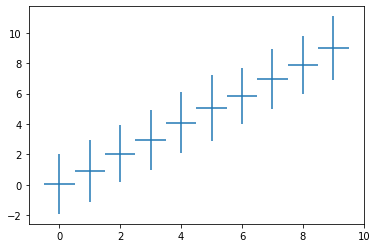

In [166]:
# R https://www.r-graph-gallery.com/4-barplot-with-error-bar.html
# Python https://stackoverflow.com/questions/44603615/plot-95-confidence-interval-errorbar-python-pandas-dataframes
# https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/

#예제
df = pd.DataFrame()
df['category'] = np.random.choice(np.arange(10), 1000, replace=True)
df['number'] = np.random.normal(df['category'], 1)

mean = df.groupby('category')['number'].mean()
std = df.groupby('category')['number'].std()

plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.show()

matplotlib의 연습이 필요한것 같습니다. 완수하지 못하였습니다.

### **2) `plt.bar`를 사용하여 신뢰구간을 비교하세요.**

In [ ]:
# 1차 시도
## https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/
## https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
## https://python-graph-gallery.com/8-add-confidence-interval-on-barplot/

# average
import matplotlib.pyplot as plt

o3_mean_sample1_n20
o3_mean_sample2_n200

#st.dev or stderr of each samples
stderr_n20
stderr_n200
bot_pos = [o3_mean_sample1_n20, o3_mean_sample2_n200]
# Define labels, positions, bar heights and error bar heights
labels = ['Sample Size of 20', 'Sample Size of 200']
x_pos = np.arange(len(labels)) #x 의 표지션, 은 레이블수 만큼 이니까 2
heights = [o3_mean_sample1_n20, o3_mean_sample2_n200]
error = [stderr_n20, stderr_n200]

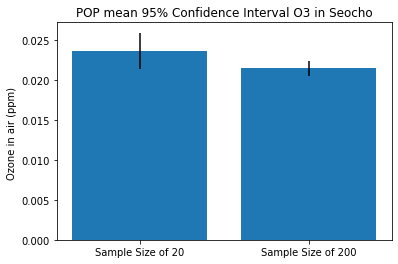

In [ ]:
# bulid the plot

fig, ax = plt.subplots()
ax.bar(x_pos, heights, yerr= error, )
ax.set_title('POP mean 95% Confidence Interval O3 in Seocho')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels);ax.set_ylabel('Ozone in air (ppm) ');

위의 그래프를 보면, bar 그래프의 맨 윗 부분은 신뢰구간의 중심을 나타냅니다.

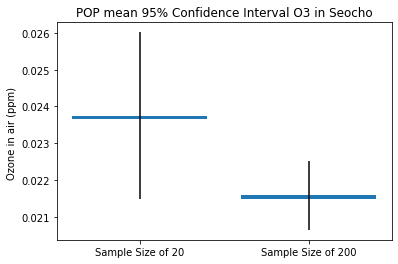

In [165]:
# 2차 시도.
fig, ax = plt.subplots()
ax.bar(x_pos, height= 0.0001, yerr= error, bottom= heights)
ax.set_title('POP mean 95% Confidence Interval O3 in Seocho')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels);ax.set_ylabel('Ozone in air (ppm) ');

# 오 야매/ Fake/ 가라, 로 bar graph의 높이를 낮게 잡고, bottom (the starting point of the bar graph)를 mean 값으로 둬서, 풀긴지만 올바르게 한것 같이 않습니다.
# 지도 부탁드립니다.

## 4단계 - 실제와의 비교

**200, 20개의 샘플 데이터가 아닌 전체 데이터에 대해서 평균을 계산하고 추측된 평균값과의 비교를 해보세요.**

In [175]:
pop_mean = seocho_aug_airqual['오존(ppm)'].mean()

print('전체 데이터 평균 값 :', pop_mean)
print('샘플_20 평균 :', o3_mean_sample1_n20)
print('샘플_200 평균 :', o3_mean_sample2_n200,)

전체 데이터 평균 값 : 0.02101344086021499
샘플_20 평균 : 0.02365000000000001
샘플_200 평균 : 0.021484999999999976


sampling을 통해 추측된 샘플사이즈 20의 값과, 200의 값을 비교해보면
샘플사이즈 200의 평균이, 전체 데이터 평균 값가 거의 비슷하다.
샘플사이즈 20은, 오차가 좀 있다.

# 🔥 도전과제:

matplotlib는 좋은 시각화 라이브러리이지만, 유일한 시각화 라이브러리는 아닙니다.

[plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.